# Programming Assignment 3 - Linear Regression 

## Step 1:  Example linear regression code

Study the following source code from the scikit-learn documentation https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


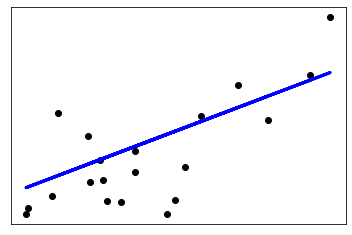

In [118]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection, preprocessing
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

We will also test linear regression with this same dataset, but using the other individual features.

In [119]:
#  Before proceeding, let's explore the diabetes dataset
#  Also, we no longer want to divide the data into training and test.  Instead, we will be using
#  the whole dataset for cross-validation.
#
# Reloading the dataset
diabetes_alldata = datasets.load_diabetes()
diabetes_X = diabetes_alldata.data
diabetes_Y = diabetes_alldata.target
# Observe the number of features and the number of labels
print('The number of features is: ', diabetes_X.shape[1])
# Printing out the features
print('The features: ', diabetes_alldata.feature_names)
# The number of examples
print('The number of examples in our dataset: ', diabetes_X.shape[0])
#Observing the first 2 rows of the data

print(diabetes_X[0:5])

#According to the scikit documentation, each of these 10 feature variables have already been scaled.
#So, we will not scale them prior to running linear regression.
#
#More particularly, they have been mean centered and scaled by the standard deviation times 
# n_samples (i.e. the sum of squares of each column totals 1). 
#This explains why e.g., the age feature can have negative values.

The number of features is:  10
The features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
The number of examples in our dataset:  442
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


# Your code goes here

In [120]:
# Using the code above as a model, write a function that
# runs linear regression on a data matrix X with target y, using only the ith feature in X, and returns the results in an array w where the first entry
# is the intercept and the second entry is the coefficient on the ith feature.

from sklearn import datasets, linear_model, model_selection, preprocessing
from sklearn.metrics import mean_squared_error, r2_score

def train_linear(X,y,i):
    #### TO-DO #####
    # i in [0,...,n-1]
    
    # Use only ith feature
    x = X[:, np.newaxis, i]

    # Split the data into training/testing sets
    x_train = x[:-20]
    x_test = x[-20:]

    # Split the targets into training/testing sets
    y_train = y[:-20]
    y_test = y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    
    ###############
    w = [regr.intercept_] + [*regr.coef_]
    return w # w = [w0, wi]


train_linear(diabetes_X, diabetes_y, 0)


[153.24279071761313, 306.727574985305]

In [158]:
#create own MSE function for linear functions

def MSE_linear(x, y, w):
    
    train_size = x.shape[0]
    mse = 0
    
    for i in range(train_size):
        
        y_pred = w[0] + np.dot(w[1], x[i])
        mse = mse + (y_pred - y[i])**2
    
    return mse

In [163]:
# TODO - Define a function that takes training and test sets as input, along with a weight vector w,
# and returns the training and test error of the linear function defined by w.  Use MSE as the error function.

def evaluate_err(X_train, X_test, y_train, y_test, w, i):
    #### TO-DO #####

    
    train_error = MSE_linear(X_train, y_train, w) / X_train.shape[0]
    test_error = MSE_linear(X_test,y_test,w) / X_test.shape[0]

    
#USES MODEL and api's, CAN USE THIS OR BEFORE METHOD
#         # Create linear regression object
#     regr = linear_model.LinearRegression()

#     # Train the model using the training sets
#     regr.fit(X_train, y_train)

#     # Make predictions using the testing set
#     diabetes_y_pred = regr.predict(X_test)

#     # The mean squared error
#     print('Mean squared error: %.2f'
#           % mean_squared_error(y_test, diabetes_y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#USES MODEL, CAN USE THIS OR BEFORE METHOD
    
    ##############
    return int(train_error), int(test_error)


In [164]:
i = 0

X, y = datasets.load_diabetes(return_X_y=True)

w = train_linear(X, y, i)

x = X[:, np.newaxis, i]

# Split the data into training/testing sets
x_train = x[:-20]
x_test = x[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

evaluate_err(x_train, x_test, y_train, y_test, w, i)

(5733, 5472)

In [123]:
# TODO - Finish writting the k_fold_cross_validation function. 
# TODO - Returns the average training MSE and average test MSE from the k-fold cross validation
# use Sklearns K-Folds cross-validator: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

from sklearn.model_selection import KFold

def k_fold_cross_validation(k, X, y, i):
    
    X = X[:, np.newaxis, i]
    
    kf = model_selection.KFold(n_splits=k, random_state=10, shuffle=True)
    trainMSEs = []
    testMSEs = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # scaling the data matrix
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
        # determine the training error and the test error
        #### TO-DO #####
       
        #TRAIN ERROR
        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(X_train, y_train)

        # Make predictions using the testing set
        y_pred_train = regr.predict(X_train)
        
        # MSE of Train data
        err_train = mean_squared_error(y_train, y_pred_train)
        trainMSEs.append(err_train)
        
        #TEST ERROR
        
        # Make predictions using the testing set
        y_pred_test= regr.predict(X_test)
        
        # MSE of test data using y_pred of train data
        err_test = mean_squared_error(y_test, y_pred_test)
        testMSEs.append(err_test)
        
        ##############
    avgtrainMSE = np.mean(trainMSEs)
    avgtestMSE = np.mean(testMSEs)
    return  avgtrainMSE, avgtestMSE

i = 0
X, y = datasets.load_diabetes(return_X_y=True)

k_fold_cross_validation(5, X, y, i)


(5717.095266000486, 5748.486964339176)

In [124]:
# TODO
# For each feature i, run 5-fold cross-validation on the whole dataset and print the average test MSE for feature i
#### TO-DO #####

X, y = datasets.load_diabetes(return_X_y=True)
features = diabetes_alldata.feature_names

print('Feature Test MSE average')

#number of features
for i in range(diabetes_X.shape[1]):
    err = k_fold_cross_validation(5, X, y, i)
    print (f'{i + 1} {features[i]}: {err[1]}')

###############

Feature Test MSE average
1 age: 5748.486964339176
2 sex: 6002.751393583516
3 bmi: 3920.168381076469
4 bp: 4779.053249201024
5 s1: 5681.73738930403
6 s2: 5779.024472948226
7 s3: 5027.811690637469
8 s4: 4863.581200239138
9 s5: 4059.685000391498
10 s6: 5082.308054247711


In [155]:
#Feature with lowest error is BMI (i = 2)

vals = np.array([ 0.07440129, -0.04464164, -0.02021751, 0.04597245, 0.07410845, 0.0328, -0.03603757, 0.07120998, 0.10635428, 0.03620126]
)


# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
x = diabetes_X[:, np.newaxis, 2]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, diabetes_y)

w = [regr.intercept_] + [*regr.coef_]

y_pred = w[0] + np.dot(w[1], vals[2])
#same as
#y_pred = regr.predict(vals[2].reshape(1,-1))

print('y_pred for example is: ',y_pred)




y_pred for example is:  132.93826729173162
